<a href="https://colab.research.google.com/github/Mohd-Ali2/Projects/blob/main/Sleep_Disorder_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sleep_data.csv')

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [5]:
df = df.drop(columns=['BMI Category', 'Occupation', 'Person ID', 'Blood Pressure'])

In [6]:
df

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,6.1,6,42,6,77,4200,None
1,Male,28,6.2,6,60,8,75,10000,None
2,Male,28,6.2,6,60,8,75,10000,None
3,Male,28,5.9,4,30,8,85,3000,Sleep Apnea
4,Male,28,5.9,4,30,8,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...
369,Female,59,8.1,9,75,3,68,7000,Sleep Apnea
370,Female,59,8.0,9,75,3,68,7000,Sleep Apnea
371,Female,59,8.1,9,75,3,68,7000,Sleep Apnea
372,Female,59,8.1,9,75,3,68,7000,Sleep Apnea


<Axes: xlabel='Sleep Disorder', ylabel='Daily Steps'>

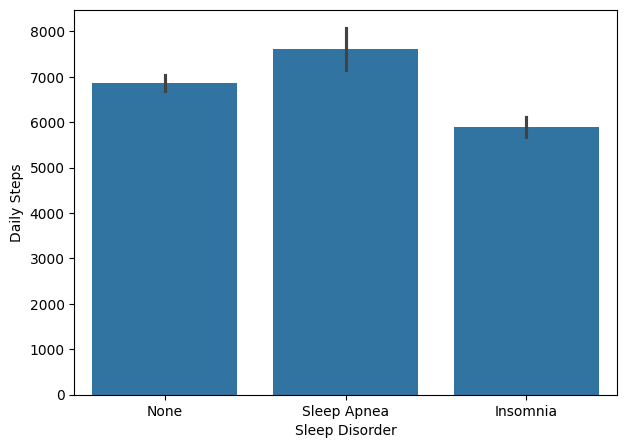

In [13]:
plot = plt.figure(figsize=(7, 5))
sns.barplot(x = 'Sleep Disorder', y = 'Daily Steps', data = df)

<Axes: xlabel='Sleep Disorder', ylabel='Heart Rate'>

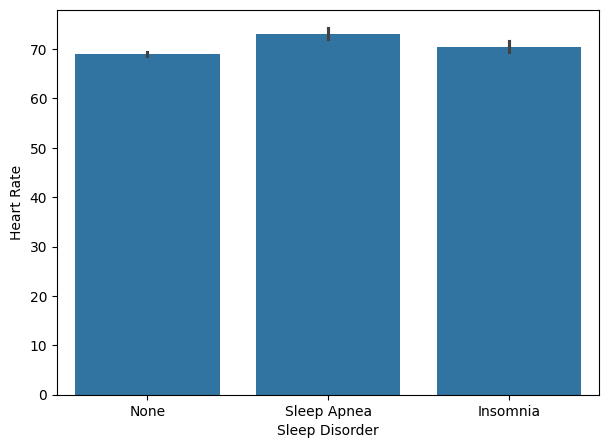

In [16]:
plot = plt.figure(figsize=(7, 5))
sns.barplot(x = 'Sleep Disorder', y = 'Heart Rate', data = df)

<Axes: xlabel='Sleep Disorder', ylabel='Age'>

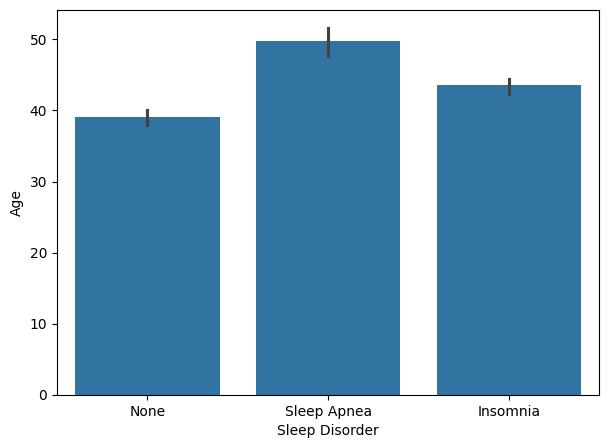

In [17]:
plot = plt.figure(figsize=(7, 5))
sns.barplot(x = 'Sleep Disorder', y = 'Age', data = df)

<ipython-input-32-05a87d1552f6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

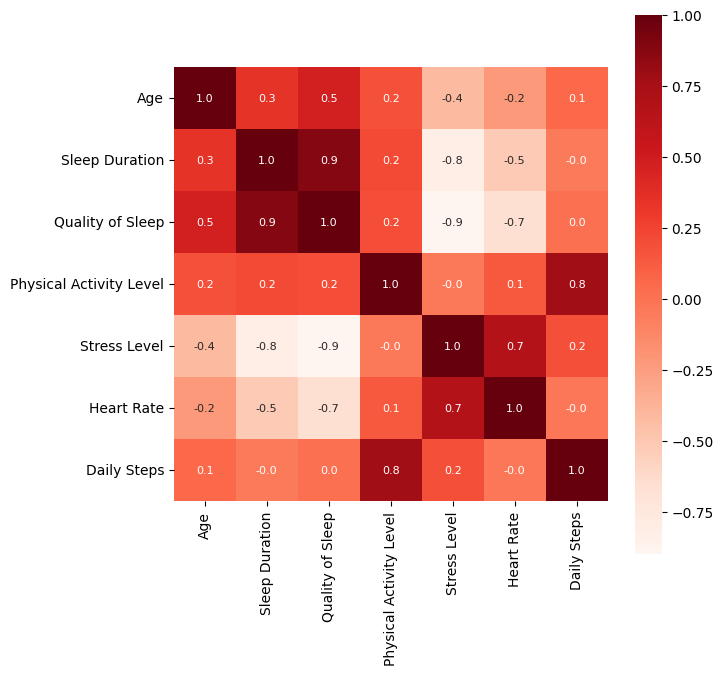

In [32]:
correlation = df.corr()
plt.figure(figsize = (7, 7))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Reds')

In [18]:
df.shape

(374, 9)

In [19]:
y = df.iloc[:, -1].values

In [20]:
x = df.iloc[:, :-1].values

In [21]:
x

array([['Male', 27, 6.1, ..., 6, 77, 4200],
       ['Male', 28, 6.2, ..., 8, 75, 10000],
       ['Male', 28, 6.2, ..., 8, 75, 10000],
       ...,
       ['Female', 59, 8.1, ..., 3, 68, 7000],
       ['Female', 59, 8.1, ..., 3, 68, 7000],
       ['Female', 59, 8.1, ..., 3, 68, 7000]], dtype=object)

In [22]:
y

array(['None', 'None', 'None', 'Sleep Apnea', 'Sleep Apnea', 'Insomnia',
       'Insomnia', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'Sleep Apnea', 'Sleep Apnea', 'Insomnia', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'Sleep Apnea', 'Insomnia', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'Sleep Apnea',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'Insomnia', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'Sleep Apnea',
       'Sleep Apnea', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'Sleep Apnea', 'Insomnia',
       'None', 'None', 'None', 'None', 'None', 'None', 'None',

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [24]:
print(x)

[[0.0 1.0 27 ... 6 77 4200]
 [0.0 1.0 28 ... 8 75 10000]
 [0.0 1.0 28 ... 8 75 10000]
 ...
 [1.0 0.0 59 ... 3 68 7000]
 [1.0 0.0 59 ... 3 68 7000]
 [1.0 0.0 59 ... 3 68 7000]]


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
y

array([1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [28]:
y_train

array([0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2,
       1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2,
       1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1,
       0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 2, 0,
       1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1,
       2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) * 100

[[15  2  3]
 [ 1 40  0]
 [ 1  1 12]]


89.33333333333333

In [45]:
input_data = (5, 1,	28,	5.9,	4,	30,	8,	85,	3000)
np_arr = np.asarray(input_data)
reshape = np_arr.reshape(1, -1)
prediction = classifier.predict(reshape)
print(prediction)
if (prediction[0]==1):
  print('None')
elif (prediction[0]==2):
  print('Sleep Apnea')
else:
  print('Insomnia')

[1]
None
